<a href="https://colab.research.google.com/github/chintamaneni11905158/ml/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import sqrt

In [ ]:
Data = pd.read_csv('NFLX.csv')
Data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


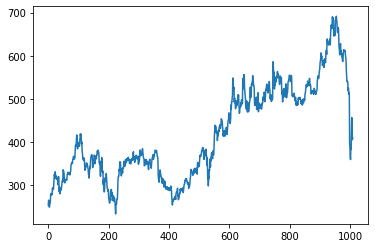

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Data['Close'].plot()


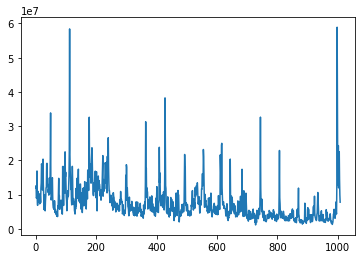

In [ ]:
Data['Volume'].plot()

In [ ]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
x = Data[['Open','High','Low','Adj Close','Volume']]
y = Data[['Close']]

In [ ]:
x

,Open,High,Low,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,9905200


In [ ]:
y

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001
...,...
1004,427.140015
1005,457.130005
1006,429.480011
1007,405.600006


In [ ]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [ ]:
y_test

,Close
740,507.790009
617,502.410004
531,319.750000
522,383.790009
462,302.859985
...,...
572,441.950012
135,316.779999
336,360.869995
218,262.799988


In [ ]:
x_test

,Open,High,Low,Adj Close,Volume
740,495.500000,512.349976,493.010010,507.790009,5032100
617,489.140015,504.500000,484.200012,502.410004,11940300
531,306.190002,322.899994,290.250000,319.750000,10013900
522,377.769989,384.010010,370.510010,383.790009,5487300
462,305.269989,306.480011,298.809998,302.859985,4615500
...,...,...,...,...,...
572,444.899994,452.380005,432.820007,441.950012,9007500
135,319.010010,324.369995,312.959991,316.779999,10407900
336,357.390015,365.149994,355.690002,360.869995,4777300
218,266.510010,272.980011,261.079987,262.799988,9634700


In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train)
x_test = s_scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(units=6, kernel_initializer='he_uniform',input_dim=5))
model.add(Dense(units=6, kernel_initializer='he_uniform'))
model.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          batch_size=10,epochs=100,validation_split=0.2)

Epoch 1/100
91/91 [==============================] - 1s 4ms/step - loss: 185749.0625 - val_loss: 185937.0312
Epoch 2/100
91/91 [==============================] - 0s 3ms/step - loss: 183881.9062 - val_loss: 183474.2812
Epoch 3/100
91/91 [==============================] - 0s 3ms/step - loss: 180748.7344 - val_loss: 179190.3438
Epoch 4/100
91/91 [==============================] - 0s 3ms/step - loss: 175530.1875 - val_loss: 172809.2656
Epoch 5/100
91/91 [==============================] - 0s 3ms/step - loss: 168033.1406 - val_loss: 163857.6250
Epoch 6/100
91/91 [==============================] - 0s 3ms/step - loss: 158426.4219 - val_loss: 153566.4375
Epoch 7/100
91/91 [==============================] - 0s 3ms/step - loss: 147477.5625 - val_loss: 141850.8438
Epoch 8/100
91/91 [==============================] - 0s 3ms/step - loss: 135647.1406 - val_loss: 129711.6406
Epoch 9/100
91/91 [==============================] - 0s 3ms/step - loss: 122861.9844 - val_loss: 116614.0781
Epoch 10/100
91/91 

4/4 [==============================] - 0s 3ms/step
MAE: 1.673808748984762
MSE: 5.170531816766789
RMSE: 2.2738803435464208
VarScore: 0.9995919018885546


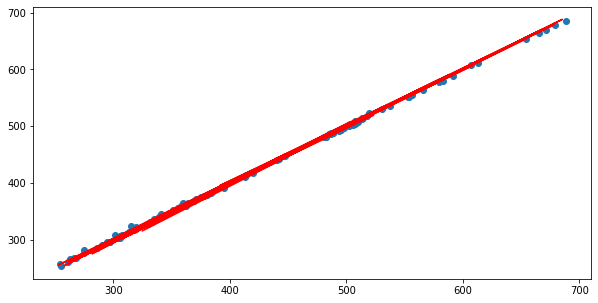

In [ ]:
y_pred = model.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_pred,y_test,'r')